<a href="https://colab.research.google.com/github/Rumaisa1054/Data_Science/blob/main/stats_visuals/stats/MANOVA_and_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MANOVA**
Manova is a multivariate extension of ANOVA. It is used to model two or more dependent variables that are continuous with one or more categorical predictor variables. It is often used to assess for differences between two or more groups.

To perform a Multivariate Analysis of Variance (MANOVA) in Python, we typically use the statsmodels library. MANOVA is used when there are two or more dependent variables and one or more independent variables. It tests whether the mean differences among groups on a combination of dependent variables are likely to have occurred by chance.

Here's an example demonstrating how to create a MANOVA table in Python

# **Example: MANOVA with StatsModels**
Let's say we have a dataset with two dependent variables (e.g., test scores in mathematics and science) and one independent variable (e.g., teaching method).

We want to know if there are statistically significant differences in the dependent variables across the levels of the independent variable.

# **Explanation:**
**Dataset Preparation:** The data dictionary and DataFrame (df) contain the sample data. Replace this with your actual data.

**MANOVA Execution:** The MANOVA.from_formula method is used to perform the MANOVA.

The formula 'MathScore + ScienceScore ~ Method' indicates that MathScore and ScienceScore are dependent variables, and Method is the independent variable.


Results: The mv_test() method is used to get the MANOVA test results, which are printed to the console.


In [19]:
# Sample data
data = pd.DataFrame({
    "Growth": [20, 22, 19, 24, 25, 28, 30, 27, 26, 29, 18, 20, 22, 19, 24,
               21, 23, 20, 25, 26, 29, 31, 28, 27, 30, 19, 21, 23, 20, 25],
    "Fertilizer": ["F1", "F1", "F1", "F1", "F1", "F2", "F2", "F2", "F2", "F2",
                   "F3", "F3", "F3", "F3", "F3", "F1", "F1", "F1", "F1", "F1",
                   "F2", "F2", "F2", "F2", "F2", "F3", "F3", "F3", "F3", "F3"],
    "Sunlight": ["High", "High", "High", "High", "High", "High", "High", "High", "High", "High",
                 "High", "High", "High", "High", "High", "Low", "Low", "Low", "Low", "Low",
                 "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low", "Low"]
})

# **REVISION one way anova**

In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
anova = ols('Growth ~ C(Fertilizer)', data=data).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print("----------------")
print(anova_table)
print("-----------------")

anova = ols('Growth ~ C(Fertilizer) + C(Sunlight)', data=data).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
anova_table.head()


# For two - way anova code is same -
# dependent varibale tilda then independent separated with +
# dep ~ C(indep1) + C(indep2) to so on


----------------
                   sum_sq    df          F        PR(>F)
C(Fertilizer)  309.066667   2.0  33.140588  5.385074e-08
Residual       125.900000  27.0        NaN           NaN
-----------------


,sum_sq,df,F,PR(>F)
C(Fertilizer),309.066667,2.0,33.934685,5.647326e-08
C(Sunlight),7.500000,1.0,1.646959,2.106945e-01
Residual,118.400000,26.0,NaN,NaN


# **MANOVA**

In [21]:
# Example dataset
data = {
    'Method': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'], # groups should be balanced
    'MathScore': [20, 22, 21, 19, 18, 20, 22, 23, 21],
    'ScienceScore': [30, 28, 29, 33, 32, 31, 29, 27, 28]
}

In [22]:
from statsmodels.multivariate.manova import MANOVA

df = pd.DataFrame(data)
print(df.head(10))

  Method  MathScore  ScienceScore
0      A         20            30
1      A         22            28
2      A         21            29
3      B         19            33
4      B         18            32
5      B         20            31
6      C         22            29
7      C         23            27
8      C         21            28


In [23]:
# Perform MANOVA
# dependents separated with + and tilda then independent var
# (dep1 + dep2 + dep3) ~ independent_vars
maov = MANOVA.from_formula('MathScore + ScienceScore ~ Method', data=df) #  add variables before tilda
print(maov.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept          Value   Num DF Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda    0.0005 2.0000 5.0000 4711.5000 0.0000
         Pillai's trace    0.9995 2.0000 5.0000 4711.5000 0.0000
 Hotelling-Lawley trace 1884.6000 2.0000 5.0000 4711.5000 0.0000
    Roy's greatest root 1884.6000 2.0000 5.0000 4711.5000 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
             Method         Value  Num DF  Den DF F Value Pr > F
----------------------------------------------------------------
              Wilks' lambda 0.1802 4.0000 10.0000  3.3896 0.0534
             Pillai's trace 0.8468 4.0000 12.

# **MANOVA Test Results Interpretation**

MANOVA gives four multivariate tests:

- Wilks' Lambda

- Pillai's Trace

- Hotelling–Lawley Trace

- Roy's Greatest Root

All test whether:

**H₀: Teaching Method has no effect on Math or Science scores.**

**H₁: Teaching Method has an effect.**

| Test      | p-value | Significant? |
| --------- | ------- | ------------ |
| Wilks     | 0.0534  | ❌ No         |
| Pillai    | 0.1301  | ❌ No         |
| Hotelling | 0.0444  | ✔ Yes        |
| Roy       | 0.0065  | ✔ Yes        |


# **Interpertation of MANOVA Results**
The MANOVA results provided contain two main parts: the test statistics associated with the intercept and the test statistics associated with the independent variable (Method). Each part includes four different test statistics: Wilks' lambda, Pillai's trace, Hotelling-Lawley trace, and Roy's greatest root. Let's interpret these results:

## **Intercept Part**

**Wilks' Lambda:** A value close to 0 (0.0005) with a significant F-value (4711.5) and a p-value of 0.0000 indicates that the model with the intercept is significantly different from a model without the intercept.

**Pillai's Trace:** Similar to Wilks' lambda, a value close to 1 (0.9995) with a significant F-value and p-value indicates strong model significance.

**Hotelling-Lawley Trace:** A very high value (1884.6) with a significant F-value and p-value also suggests strong model significance.

**Roy's Greatest Root:** Like Hotelling-Lawley trace, a high value (1884.6) with a significant F-value and p-value indicates the model's significance.

# **Method Part**
**Wilks' Lambda:** A value of 0.1802 with an F-value of 3.3896 and a p-value of 0.0534. This p-value is marginally above the typical alpha level of 0.05, suggesting that the differences in group means are not quite statistically significant at the 5% level.

**Pillai's Trace:** A value of 0.8468, F-value of 2.2031, and a p-value of 0.1301. This result further indicates that the group means are not significantly different, as the p-value is above 0.05.

**Hotelling-Lawley Trace:** A value of 4.4 with an F-value of 5.4 and a p-value of 0.0444. This p-value is below 0.05, indicating significant differences in the group means.

**Roy's Greatest Root:** A value of 4.3656, with an F-value of 13.0969 and a p-value of 0.0065. This result suggests significant differences in the group means, as indicated by this low p-value.

# **Overall Interpretation**
The significant intercept part indicates that the overall model is significant.
For the Method part, different test statistics provide somewhat conflicting results. Wilks' Lambda and Pillai's Trace suggest that the means of different methods are not significantly different, while Hotelling-Lawley Trace and Roy's Greatest Root suggest significant differences.
Such discrepancies can occur due to the sensitivity of each test to different assumptions and data characteristics. In practice, when results conflict, it's often advisable to further investigate the data, potentially considering other forms of analysis or looking into specific pairwise comparisons for more insights.

# **Co-relation**

Types of Correlation tests:

- Pearson's correlation coefficient
- Spearman's rank correlation coefficient
- Kendall's rank correlation coefficient
- Point-Biserial correlation coefficient
- Biserial correlation coefficient
- Phi coefficient
- Cramer's V

# **Pearson's correlation coefficient**
Pearson's correlation coefficient is a measure of the linear correlation between two variables X and Y. It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

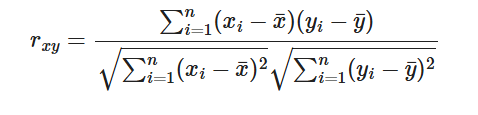

# **Spearman's rank correlation coefficient**
Spearman's rank correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation does not assume that both datasets are normally distributed. Like other correlation coefficients, this one varies between +1 and −1 with 0 implying no correlation. Correlations of −1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

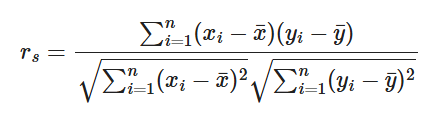

In [24]:
# pearson's correlation coefficient
import pandas as pd
import numpy as np
def pearson(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    n = len(x)
    return sum((x-x_mean)*(y-y_mean))/(n*x_std*y_std)
# example dataset
x = np.array([1,2,3,4,5])
y = np.array([2,4,5,4,5])
print(f"Pearson Correlation Coefficient: {pearson(x,y)}")

# print with if else statement
if pearson(x,y) < 0.6 > 0:
    print("Positive Correlation.")
elif pearson(x,y) > 0.6:
    print("Highly Positive Correlation.")
elif pearson(x,y) > -0.6 < 0:
    print("Negative Correlation.")
elif pearson(x,y) < -0.6:
    print("Highly Negative Correlation.")
else:
    print("No Correlation.")

Pearson Correlation Coefficient: 0.7745966692414834
Highly Positive Correlation.


In [25]:
# SPearman's correlation coefficient
def spearman(x, y):
    x_rank = pd.Series(x).rank()
    y_rank = pd.Series(y).rank()
    return pearson(x_rank, y_rank)

print(f"Spearman Correlation Coefficient: {spearman(x,y)}")

# print with if else statement
if spearman(x,y) < 0.6 > 0:
    print("Positive Correlation")
elif spearman(x,y) > 0.6:
    print("Highly Positive Correlation")
elif spearman(x,y) > -0.6 < 0:
    print("Negative Correlation")
elif spearman(x,y) < -0.6:
    print("Highly Negative Correlation")
else:
    print("No Correlation")

Spearman Correlation Coefficient: 0.7378647873726218
Highly Positive Correlation


In [26]:
import pandas as pd
import numpy as np

# example dataset
x = np.array([1,2,3,4,5])
y = np.array([2,4,5,4,5])

# pearson's correlation coefficient

pearson = np.corrcoef(x,y)
print(f"Pearson Correlation Coefficient: {pearson[0,1]}")

Pearson Correlation Coefficient: 0.7745966692414834


In [27]:
# creata an example dataset

x = pd.Series([1,2,3,4,5])
y = pd.Series([2,4,5,4,5])

# pearson's correlation coefficient
pearson_corr = x.corr(y)
print(f"Pearson Correlation Coefficient: {pearson_corr}")

Pearson Correlation Coefficient: 0.7745966692414834


In [28]:
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [29]:
# using correlation matrix in pandas

df = pd.DataFrame({'x':x, 'y':y})

# pearson's correlation coefficient
pearson_corr = df.corr(method = 'pearson')
spearman_corr = df.corr(method = 'spearman')
kendall_corr = df.corr(method = 'kendall')

print(f"Pearson Correlation Coefficient:\n {pearson_corr}")
print("====================================")
print(f"Spearman Correlation Coefficient:\n {spearman_corr}")
print("====================================")
print(f"Kendall Correlation Coefficient:\n {kendall_corr}")

Pearson Correlation Coefficient:
           x         y
x  1.000000  0.774597
y  0.774597  1.000000
Spearman Correlation Coefficient:
           x         y
x  1.000000  0.737865
y  0.737865  1.000000
Kendall Correlation Coefficient:
          x        y
x  1.00000  0.67082
y  0.67082  1.00000


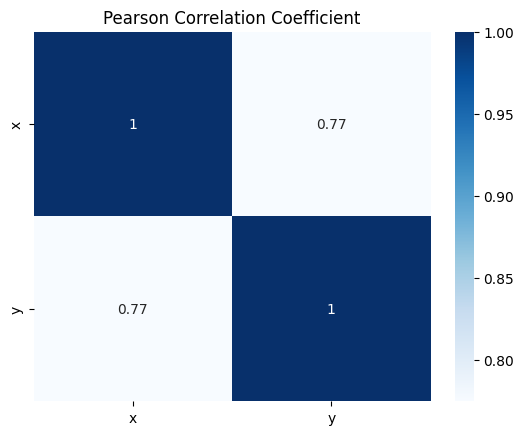

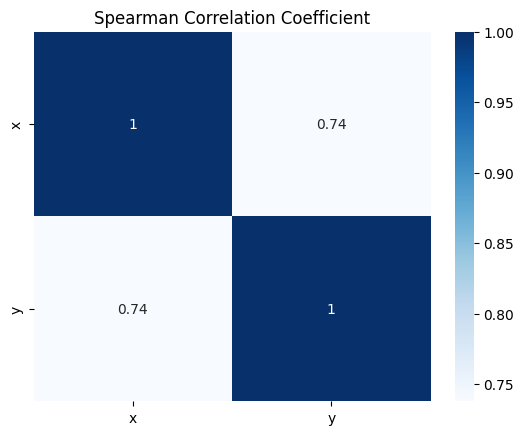

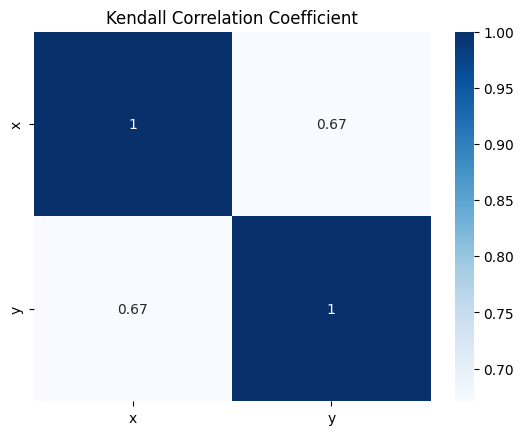

In [30]:
# Draw a heatmap with the numeric values in each cell
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pearson_corr, annot=True, cmap='Blues')
plt.title('Pearson Correlation Coefficient')
plt.show()
sns.heatmap(spearman_corr, annot=True, cmap='Blues')
plt.title('Spearman Correlation Coefficient')
plt.show()
sns.heatmap(kendall_corr, annot=True, cmap='Blues')
plt.title('Kendall Correlation Coefficient')
plt.show()